# Minimum spanning tree (MST) of IZA zeolites

In this notebook, we will create the MST of IZA zeolites based on their AMD. The code to calculate the AMD is provided.

In [1]:
import os
import math
import pandas as pd
import numpy as np
import amd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.spatial.distance import squareform, pdist

## Calculation of the AMD

In [2]:
k = 100
path = os.path.abspath('../data/iza')
_dm = amd.compare(path, by='AMD', k=k)

In [3]:
dm = _dm.copy()

zeolites = [
    name.strip(".cif")
    for name in sorted(os.listdir(path))
]
zeolites[zeolites.index("CIT-1")] = "CON"

dm.index = zeolites
dm.columns = zeolites

In [4]:
# make the mst
graph = nx.Graph()

# add all connections between all nodes then use nx.minimum_spanning_tree
graph.add_weighted_edges_from(
    (i1, i2, d) for (i1, i2), d in zip(combinations(range(len(dm)), 2), squareform(dm.values))
)
_attrs = {i: z for i, z in enumerate(zeolites)}
nx.set_node_attributes(graph, _attrs, "zeo")

G = nx.minimum_spanning_tree(graph)

## Plotting the graph

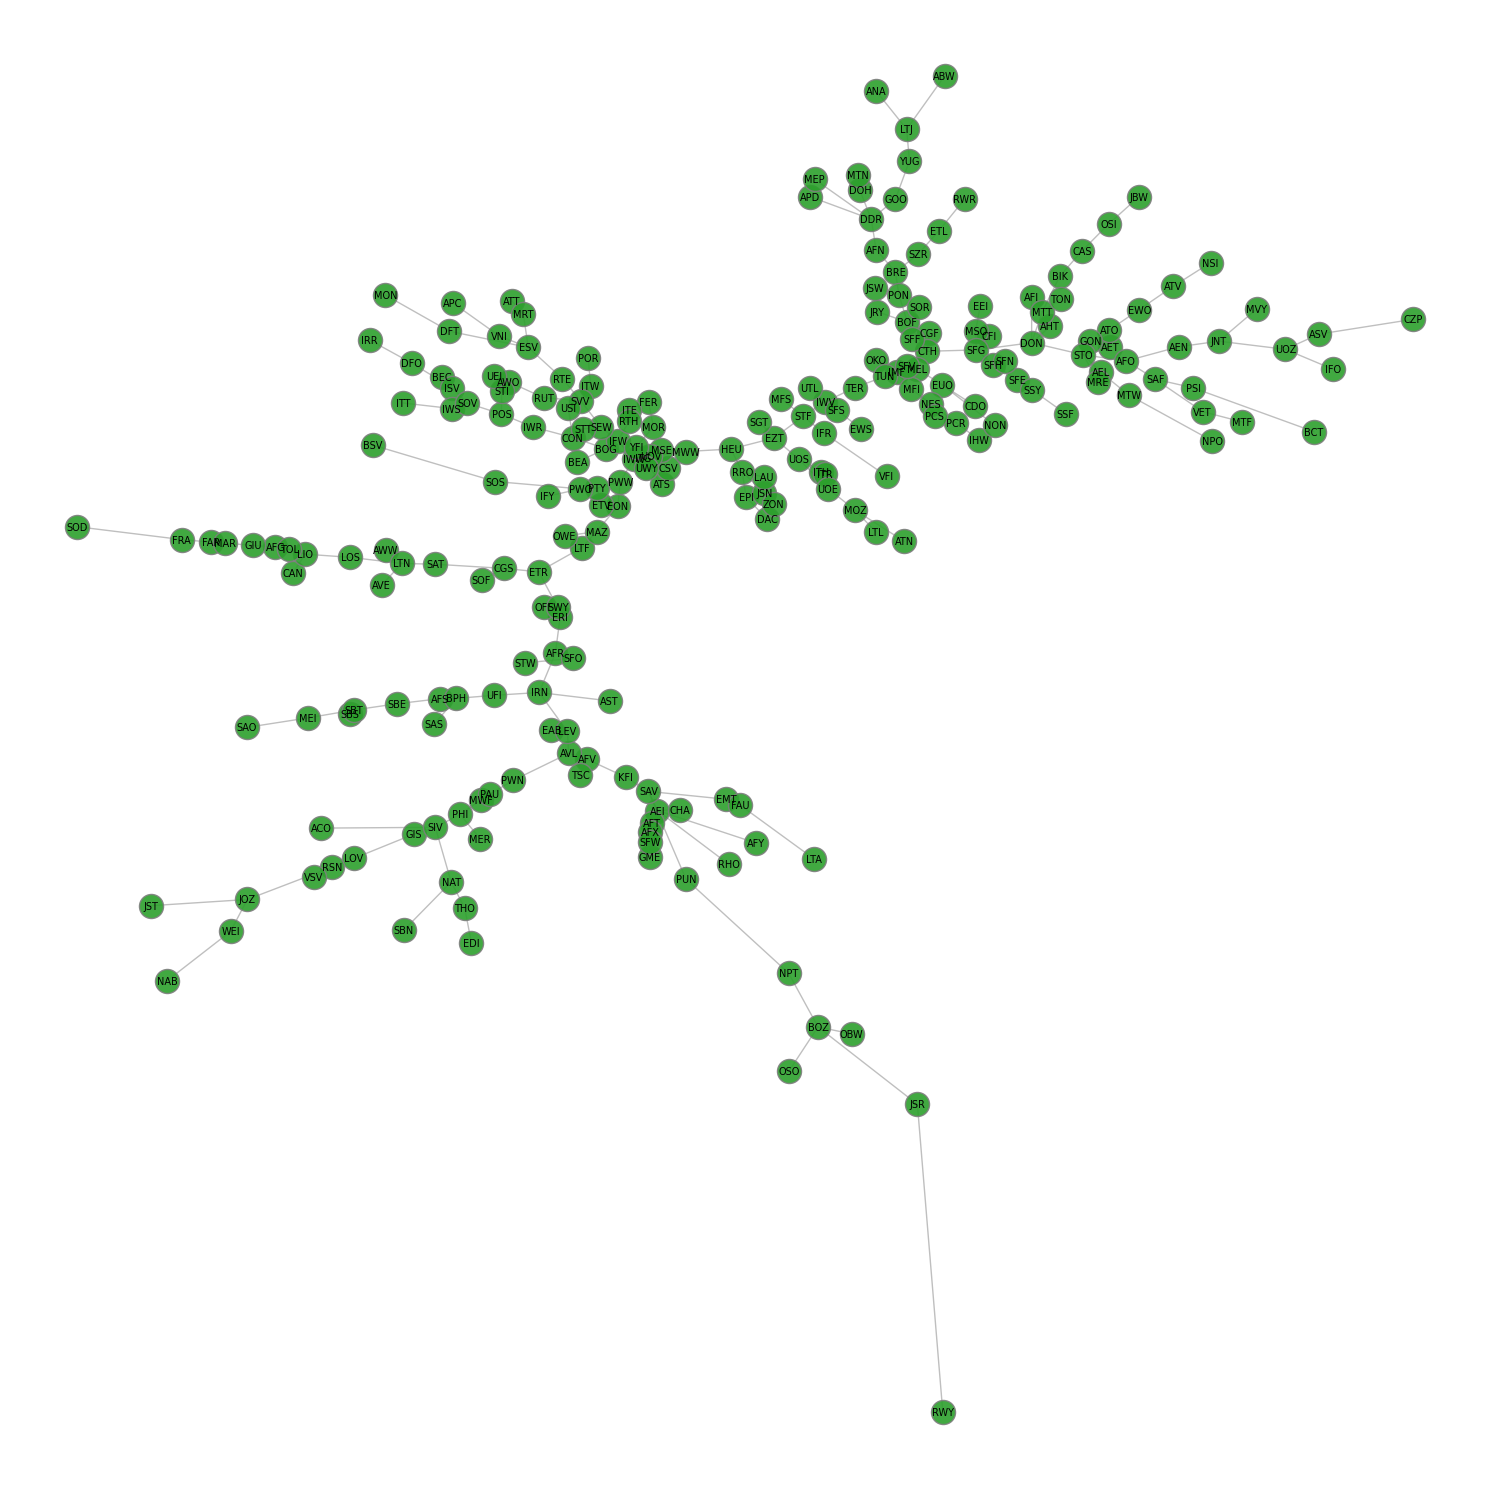

In [5]:
L = 15
fig, ax = plt.subplots(figsize=(L, L))

pos = nx.kamada_kawai_layout(G)

options = {"edgecolors": "tab:gray", "node_size": 300, "alpha": 0.9}

nx.draw_networkx_nodes(G, pos, node_color="tab:green", **options)

for i, j in G.edges:
    xy = np.stack([pos[i], pos[j]])
    ax.plot(xy[:, 0], xy[:, 1], linewidth=1.0, color="#808080", alpha=0.5, zorder=-1)
    
nx.draw_networkx_labels(G, pos, _attrs, font_size=7)

plt.tight_layout()
plt.axis("off")

# fig.savefig("iza-tmap.pdf", bbox_inches="tight", transparent=True)
plt.show()